In [1]:
import pandas
import mba263
import numpy
import matplotlib.pyplot as plt
pandas.options.mode.chained_assignment = None

In [2]:
data_original=pandas.read_csv('intuit.csv')

In [3]:
data_original

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,M,0,99824,20,4,58.0,8,19,0,0,1,0
19996,19997,M,0,99835,20,1,22.0,17,2,0,0,0,0
19997,19998,M,0,99835,20,1,29.5,12,14,0,0,0,0
19998,19999,M,0,99901,20,2,111.5,19,22,0,0,1,0


Create dummy variables

In [4]:
sex=pandas.get_dummies(data_original['sex'], drop_first=True, prefix='sex')
data_with_dummies=pandas.concat([data_original,sex],axis=1)

In [5]:
zip_bins=pandas.get_dummies(data_original['zip_bins'], drop_first=True, prefix='zip_bins')

In [6]:
data_with_dummies=pandas.concat([data_with_dummies,zip_bins],axis=1)

In [7]:
data_with_dummies

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,...,zip_bins_11,zip_bins_12,zip_bins_13,zip_bins_14,zip_bins_15,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20
0,1,U,1,99999,20,1,129.5,11,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,U,1,99999,20,2,65.0,4,14,0,...,0,0,0,0,0,0,0,0,0,1
2,3,U,1,99999,20,1,24.5,13,36,1,...,0,0,0,0,0,0,0,0,0,1
3,4,U,1,99999,20,1,80.5,5,19,1,...,0,0,0,0,0,0,0,0,0,1
4,5,U,1,99999,20,1,111.0,14,7,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,M,0,99824,20,4,58.0,8,19,0,...,0,0,0,0,0,0,0,0,0,1
19996,19997,M,0,99835,20,1,22.0,17,2,0,...,0,0,0,0,0,0,0,0,0,1
19997,19998,M,0,99835,20,1,29.5,12,14,0,...,0,0,0,0,0,0,0,0,0,1
19998,19999,M,0,99901,20,2,111.5,19,22,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data_with_dummies.to_csv('data_with_dummies.csv')

In [9]:
varlist=['bizflag','numords','dollars','last','sincepurch','version1','owntaxprod','upgraded','sex_F','sex_M','sex_U',
         'zip_bins_2','zip_bins_3','zip_bins_4','zip_bins_5','zip_bins_6','zip_bins_7','zip_bins_8',
        'zip_bins_9','zip_bins_10','zip_bins_11','zip_bins_12','zip_bins_13','zip_bins_14',
        'zip_bins_15','zip_bins_16','zip_bins_17','zip_bins_18','zip_bins_19','zip_bins_20']

Logistic Regression with no interactions

In [10]:
result_logit = mba263.logit(data_with_dummies['res1'],data_with_dummies[varlist])

Optimization terminated successfully.
         Current function value: 0.170171
         Iterations 8


In [11]:
mba263.odds_ratios(result_logit)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
bizflag,0.912018,0.079718,1.103670,0.270,0.757365,1.066671
numords,1.234541,0.037910,6.186850,0.000,1.160997,1.308086
dollars,1.001025,0.000419,2.444576,0.015,1.000211,1.001838
last,0.949440,0.003801,13.301360,0.000,0.942065,0.956814
sincepurch,1.006433,0.006462,0.995541,0.319,0.993897,1.018970
version1,1.931073,0.272024,3.422764,0.001,1.403347,2.458799
owntaxprod,1.051801,0.197585,0.262169,0.793,0.668486,1.435115
upgraded,2.235628,0.307797,4.014424,0.000,1.638502,2.832754
sex_F,0.444240,0.278054,1.998750,0.046,-0.095184,0.983664
sex_M,0.496484,0.308791,1.630605,0.103,-0.102569,1.095538


In [13]:
data_with_dummies['p_lr']=result_logit.predict()

In [14]:
gains_lr=mba263.gain(data_with_dummies['res1'],data_with_dummies['p_lr'],bins=50)
lift_lr=mba263.lift(data_with_dummies['res1'],data_with_dummies['p_lr'],bins=50)

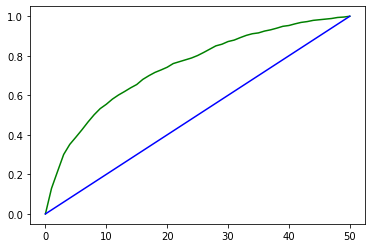

In [15]:
plt.plot(gains_lr,'g')
plt.plot([0,50],[0,1],'b')

Neural Network

In [16]:
result_nn = mba263.neural_network(data_with_dummies['res1'],data_with_dummies[varlist])

In [18]:
data_with_dummies['p_nn'] = result_nn.predict(data_with_dummies[varlist])
data_with_dummies['p_nn']

0        0.016957
1        0.031297
2        0.044048
3        0.041488
4        0.017168
           ...   
19995    0.188335
19996    0.021910
19997    0.027345
19998    0.048377
19999    0.034781
Name: p_nn, Length: 20000, dtype: float64

Compute gains measure for neural network and overlay on top of logit and baseline models

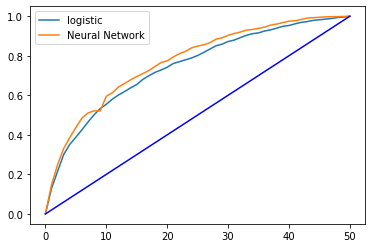

In [20]:
gains_nn=mba263.gain(data_with_dummies['res1'],data_with_dummies['p_nn'],50)
plt.plot(gains_lr, label = 'logistic')
plt.plot(gains_nn,label = 'Neural Network')
plt.plot([0,50],[0,1],'b')
plt.legend()

In [ ]:
lift_nn=mba263.lift(data_with_dummies['res1'],data_with_dummies['p_nn'],50)
plt.plot(lift_lr,'g')
plt.plot(lift_nn,'r')
plt.plot([0,50],[0,1],'b')

Random Forest

In [21]:
result_rf = mba263.random_forest(data_with_dummies['res1'],data_with_dummies[varlist],trees=1000,leaf_nodes=500)
data_with_dummies['p_rf']=result_rf.predict(data_with_dummies[varlist])
gains_rf=mba263.gain(data_with_dummies['res1'],data_with_dummies['p_rf'],50)


In [22]:
data_responsed=data_with_dummies[data_with_dummies['res1']==1]
data_responsed[['res1','p_lr','p_nn','p_rf']]

,res1,p_lr,p_nn,p_rf
8,1,0.013568,0.019587,0.103679
10,1,0.019978,0.026221,0.149384
29,1,0.080524,0.043788,0.304556
58,1,0.018859,0.023286,0.078045
120,1,0.521517,0.612699,0.484119
...,...,...,...,...
19907,1,0.009258,0.019714,0.052763
19908,1,0.037430,0.034205,0.122360
19910,1,0.079304,0.131863,0.389092
19912,1,0.033796,0.046703,0.113271


In [ ]:
#This shows for all the responsed customers in Wave 1, what is their prediction response rate based on different models.
#p1 stands for logistical regression, p_nn stands for neural network, p_rf and p_rf2 stand for random forest.

In [23]:
data_non_response=data_with_dummies[data_with_dummies['res1']==0]
data_non_response[['res1','p_lr','p_nn','p_rf']]

,res1,p_lr,p_nn,p_rf
0,0,0.020533,0.016957,0.036410
1,0,0.036482,0.031297,0.041519
2,0,0.039402,0.044048,0.036942
3,0,0.055707,0.041488,0.042054
4,0,0.017967,0.017168,0.035520
...,...,...,...,...
19995,0,0.104857,0.188335,0.071743
19996,0,0.014864,0.021910,0.026777
19997,0,0.020841,0.027345,0.034394
19998,0,0.044682,0.048377,0.035496


In [ ]:
#The above table shows for all the no-response customers' prediction response rate for different models.
#For Wave 2, we will choose customers from this dataset. 
#One simple solution is to choose 

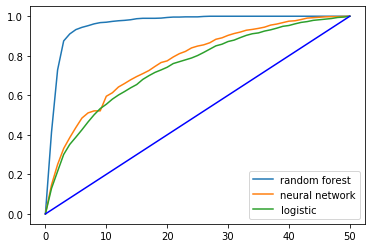

In [24]:
gains_rf=mba263.gain(data_with_dummies['res1'],data_with_dummies['p_rf'],50)

plt.plot(gains_rf,label='random forest')
plt.plot(gains_nn,label='neural network')
plt.plot(gains_lr,label='logistic')
plt.plot([0,50],[0,1],'b')
plt.legend()

Tabulate

In [25]:
data_mail_wave2_lr=data_non_response[data_non_response['p_lr']>(0.0235*2)]
data_mail_wave2_lr

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,...,zip_bins_14,zip_bins_15,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20,p_lr,p_nn,p_rf
3,4,U,1,99999,20,1,80.5,5,19,1,...,0,0,0,0,0,0,1,0.055707,0.041488,0.042054
6,7,U,1,99999,20,1,56.0,5,27,0,...,0,0,0,0,0,0,1,0.065517,0.050203,0.054020
14,15,U,1,99999,20,3,80.5,19,21,0,...,0,0,0,0,0,0,1,0.048520,0.042668,0.029859
15,16,U,1,99999,20,3,46.0,4,35,1,...,0,0,0,0,0,0,1,0.091973,0.095682,0.043664
17,18,U,1,99999,20,3,62.0,2,22,0,...,0,0,0,0,0,0,1,0.113443,0.055561,0.070691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19979,19980,M,0,99707,20,3,139.0,2,13,0,...,0,0,0,0,0,0,1,0.057117,0.043554,0.039687
19982,19983,M,0,99709,20,4,53.5,2,22,0,...,0,0,0,0,0,0,1,0.139620,0.228781,0.082702
19984,19985,U,1,99712,20,2,42.0,11,30,0,...,0,0,0,0,0,0,1,0.059896,0.052480,0.050474
19989,19990,U,1,99801,20,5,162.5,19,30,1,...,0,0,0,0,0,0,1,0.071798,0.055201,0.041955


In [26]:
data_mail_wave2_rf=data_non_response[data_non_response['p_rf']>(0.0235*2)]
data_mail_wave2_rf

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,...,zip_bins_14,zip_bins_15,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20,p_lr,p_nn,p_rf
6,7,U,1,99999,20,1,56.0,5,27,0,...,0,0,0,0,0,0,1,0.065517,0.050203,0.054020
17,18,U,1,99999,20,3,62.0,2,22,0,...,0,0,0,0,0,0,1,0.113443,0.055561,0.070691
21,22,U,1,99999,20,2,94.0,1,18,1,...,0,0,0,0,0,0,1,0.082816,0.047114,0.052801
26,27,U,1,99999,20,3,96.5,4,27,0,...,0,0,0,0,0,0,1,0.104994,0.060542,0.090782
28,29,U,1,99999,20,3,53.0,9,31,0,...,0,0,0,0,0,0,1,0.081568,0.061149,0.065357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,19966,F,0,99652,20,4,161.0,1,10,0,...,0,0,0,0,0,0,1,0.066042,0.038256,0.058317
19982,19983,M,0,99709,20,4,53.5,2,22,0,...,0,0,0,0,0,0,1,0.139620,0.228781,0.082702
19984,19985,U,1,99712,20,2,42.0,11,30,0,...,0,0,0,0,0,0,1,0.059896,0.052480,0.050474
19992,19993,M,0,99802,20,1,99.5,1,13,0,...,0,0,0,0,0,0,1,0.038650,0.035482,0.047869
